# Data Driven Materials Science Project
## PCA Implementation
first we write PCA code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eigh
import pandas as pd
import sys
df = pd.read_csv("features-bulknew.csv", index_col=0)
display(df)

,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,...,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,density,vpa,packing fraction
space_group,,,,,,,,,,,,,,,,,,,,,
124,14.0,41.0,27.0,34.166667,9.111111,41.0,47.0,78.0,31.0,54.000000,...,222.833333,9.611111,229.0,0,0,0,0.000000,7.834556,16.201654,0.688834
164,13.0,27.0,14.0,19.000000,6.400000,14.0,58.0,78.0,20.0,69.000000,...,213.400000,15.520000,194.0,-4,3,7,3.872983,5.384968,12.397466,0.644386
221,14.0,76.0,62.0,45.000000,31.000000,14.0,57.0,78.0,21.0,67.500000,...,210.500000,16.500000,194.0,-4,4,8,5.656854,13.968635,12.976265,0.569426
63,31.0,31.0,0.0,31.000000,0.000000,31.0,74.0,74.0,0.0,74.000000,...,64.000000,0.000000,64.0,0,0,0,0.000000,6.036267,19.180359,0.479802
62,14.0,44.0,30.0,34.000000,13.333333,44.0,56.0,78.0,22.0,63.333333,...,205.000000,14.666667,194.0,-4,2,6,4.242641,9.539514,13.358418,0.598395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,6.0,48.0,42.0,24.500000,11.750000,22.0,43.0,77.0,34.0,58.250000,...,194.000000,0.000000,194.0,0,0,0,0.000000,6.016734,15.190017,0.658712
63,14.0,21.0,7.0,17.500000,3.500000,14.0,11.0,78.0,67.0,44.500000,...,210.500000,16.500000,194.0,0,0,0,0.000000,3.336856,18.174013,0.625414
63,14.0,39.0,25.0,26.500000,12.500000,14.0,12.0,78.0,66.0,45.000000,...,210.500000,16.500000,194.0,0,0,0,0.000000,4.462773,21.765469,0.689264


In [2]:
import numpy as np
means = np.mean(df, axis=0)
display(means)

MagpieData minimum Number    20.685859
MagpieData maximum Number    50.078747
MagpieData range Number      29.392887
MagpieData mean Number       34.578060
MagpieData avg_dev Number    11.976731
                               ...    
range oxidation state         1.696020
std_dev oxidation state       1.048847
density                       7.904396
vpa                          17.459501
packing fraction              0.667676
Length: 139, dtype: float64

In [3]:
C = df - means
print('Corrected data:\n\n',C)

Corrected data:

              MagpieData minimum Number  MagpieData maximum Number  \
space_group                                                         
124                          -6.685859                  -9.078747   
164                          -7.685859                 -23.078747   
221                          -6.685859                  25.921253   
63                           10.314141                 -19.078747   
62                           -6.685859                  -6.078747   
...                                ...                        ...   
194                         -14.685859                  -2.078747   
63                           -6.685859                 -29.078747   
63                           -6.685859                 -11.078747   
140                          -7.685859                 -21.078747   
215                           2.314141                 -16.078747   

             MagpieData range Number  MagpieData mean Number  \
space_group         

In [4]:
covariance_matrix = np.cov(np.transpose(C))
#covariance_matrix = np.cov(C)
print('Covariance matrix:\n\n',covariance_matrix)

Covariance matrix:

 [[ 2.36424113e+02  1.20133233e+02 -1.16290880e+02 ...  3.20783554e+01
   3.48428156e+01  4.68091069e-02]
 [ 1.20133233e+02  4.49618370e+02  3.29485137e+02 ...  6.14794621e+01
   2.06705530e+01 -4.44699039e-02]
 [-1.16290880e+02  3.29485137e+02  4.45776017e+02 ...  2.94011067e+01
  -1.41722627e+01 -9.12790107e-02]
 ...
 [ 3.20783554e+01  6.14794621e+01  2.94011067e+01 ...  1.54557218e+01
  -4.12671984e+00  9.95208956e-02]
 [ 3.48428156e+01  2.06705530e+01 -1.41722627e+01 ... -4.12671984e+00
   3.94271430e+01 -2.05493934e-01]
 [ 4.68091069e-02 -4.44699039e-02 -9.12790107e-02 ...  9.95208956e-02
  -2.05493934e-01  1.98490318e-02]]


In [5]:
eigenvalues, eigenvectors = eigh(covariance_matrix)
print('Eigenvalues:\n\n',eigenvalues)
print('Eigenvectors:\n\n', eigenvectors)
print('There are',len(eigenvalues), 'eigenvalues')

Eigenvalues:

 [-1.12270238e-12 -4.79470992e-14 -1.50765457e-14 -1.24519074e-14
 -7.56288503e-15 -7.48514690e-15 -2.74605674e-15 -7.04462657e-16
 -3.81346239e-16 -2.69223136e-16 -1.50006032e-16 -9.22521418e-19
 -7.67714668e-19  4.33594305e-19  6.03458568e-19  1.24293189e-18
  5.16797020e-18  3.98143255e-17  6.15173999e-16  1.67907812e-15
  4.82159432e-15  5.11879943e-15  4.00967114e-14  1.21196597e-13
  2.71726889e-13  4.79784646e-13  2.11024186e-12  8.28115905e-11
  1.29741510e-10  1.86643230e-10  3.97108263e-04  4.21796221e-04
  4.69490710e-04  7.15247463e-04  8.01201080e-04  8.60382413e-04
  1.12939842e-03  1.29260064e-03  1.43834404e-03  2.08207158e-03
  2.22451830e-03  2.38626320e-03  2.60419253e-03  3.38124690e-03
  4.47159770e-03  5.20548271e-03  6.24728492e-03  8.31402061e-03
  8.99238171e-03  9.55068365e-03  9.82642444e-03  1.31938646e-02
  1.59178184e-02  1.87858028e-02  2.06696340e-02  2.22495301e-02
  2.55114686e-02  2.79885924e-02  3.09637055e-02  3.48899018e-02
  4.235024

In [6]:
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]
print('Largest Eigenvaue is ',eigenvalues[0])
print('Sorted Eigenvalues:\n\n', eigenvalues)

Largest Eigenvaue is  2010905.5843948096
Sorted Eigenvalues:

 [ 2.01090558e+06  8.47112149e+05  1.34182818e+05  1.72254050e+04
  8.95479877e+03  7.25713930e+03  5.93837658e+03  4.92329156e+03
  2.18057109e+03  1.02970320e+03  9.87369656e+02  6.17467813e+02
  3.58269278e+02  2.85171505e+02  2.59810497e+02  1.89383621e+02
  1.03813333e+02  7.40270802e+01  6.27943730e+01  5.75698435e+01
  3.25965661e+01  2.46154565e+01  2.15813133e+01  1.82800678e+01
  1.68143271e+01  1.53421630e+01  1.35924779e+01  1.00888680e+01
  9.52372384e+00  7.76497499e+00  7.30632216e+00  6.64733665e+00
  5.37555220e+00  5.16069720e+00  4.94883439e+00  4.36955629e+00
  3.53702564e+00  3.00456415e+00  2.61150096e+00  2.24859139e+00
  2.01829377e+00  1.87968381e+00  1.54360185e+00  1.22463867e+00
  1.09987921e+00  9.67964421e-01  8.59333028e-01  7.74966529e-01
  7.64520845e-01  6.23859351e-01  4.95436404e-01  4.42451694e-01
  4.29477562e-01  3.22863964e-01  3.10181931e-01  2.83367196e-01
  2.67832089e-01  2.4783243

In [7]:
print('Eigen vector corresponds to largest Eigenvaue is \n',eigenvectors[0])
print('\nSorted Eigenvectors:\n', eigenvectors)

Eigen vector corresponds to largest Eigenvaue is 
 [-1.17420202e-03 -2.87764714e-03 -2.77380786e-04  1.62162519e-02
 -7.46368197e-02  4.87783132e-02 -2.24807325e-02  1.53089785e-01
 -2.81312717e-02  1.41291481e-01 -3.65634385e-02  1.34732658e-01
 -2.31790896e-02  2.32083079e-02  1.32984691e-02 -4.54518685e-03
 -4.73037773e-02  4.53765696e-02  5.78776240e-02 -6.42078616e-03
  9.07250283e-02 -2.00512592e-02  2.07542437e-02 -6.24192727e-02
  7.20977412e-02 -3.49527702e-02  2.36844380e-02  7.00951003e-03
 -3.19894948e-02 -3.28731257e-02  2.28382374e-02  3.91941931e-02
  3.60993399e-02 -3.10653368e-02 -3.27651920e-02 -1.62223980e-03
 -3.90760608e-02 -7.18934184e-02  6.38543599e-02  1.04701295e-01
  1.34143664e-02  4.83954348e-03  1.65987659e-01 -1.33194882e-02
 -4.14737131e-02 -1.03896821e-01 -8.34101233e-02  1.53490402e-01
 -2.18853774e-01  2.00786112e-01 -5.80664517e-02  3.22295723e-02
 -1.42898534e-01  5.54789150e-02 -5.30961341e-02  3.90472474e-02
 -7.86184345e-03 -1.38982132e-03  1.481

In [8]:
normalized_eigenvalues = eigenvalues / np.sum(eigenvalues)
print('Normalized eigenvalues are\n', normalized_eigenvalues)

Normalized eigenvalues are
 [ 6.60843425e-01  2.78386264e-01  4.40964677e-02  5.66078074e-03
  2.94281339e-03  2.38491197e-03  1.95152729e-03  1.61794014e-03
  7.16600560e-04  3.38391118e-04  3.24479056e-04  2.02918301e-04
  1.17737948e-04  9.37158438e-05  8.53814619e-05  6.22370945e-05
  3.41161508e-05  2.43275018e-05  2.06360999e-05  1.89191640e-05
  1.07122018e-05  8.08937164e-06  7.09226186e-06  6.00737433e-06
  5.52568833e-06  5.04189138e-06  4.46689278e-06  3.31550231e-06
  3.12977911e-06  2.55180189e-06  2.40107492e-06  2.18451267e-06
  1.76656644e-06  1.69595870e-06  1.62633427e-06  1.43596625e-06
  1.16237190e-06  9.87389202e-07  8.58216942e-07  7.38954056e-07
  6.63271402e-07  6.17720043e-07  5.07273508e-07  4.02452716e-07
  3.61453043e-07  3.18101918e-07  2.82402409e-07  2.54677066e-07
  2.51244304e-07  2.05018750e-07  1.62815148e-07  1.45402795e-07
  1.41139109e-07  1.06102708e-07  1.01935014e-07  9.31228943e-08
  8.80175958e-08  8.14451141e-08  6.97248419e-08  6.69823104e-

In [9]:
cumulative_variance = np.cumsum(normalized_eigenvalues)
print('Cumulative Variances:\n',cumulative_variance)

Cumulative Variances:
 [0.66084342 0.93922969 0.98332616 0.98898694 0.99192975 0.99431466
 0.99626619 0.99788413 0.99860073 0.99893912 0.9992636  0.99946652
 0.99958426 0.99967797 0.99976335 0.99982559 0.99985971 0.99988404
 0.99990467 0.99992359 0.9999343  0.99994239 0.99994948 0.99995549
 0.99996102 0.99996606 0.99997053 0.99997384 0.99997697 0.99997952
 0.99998192 0.99998411 0.99998588 0.99998757 0.9999892  0.99999063
 0.9999918  0.99999278 0.99999364 0.99999438 0.99999504 0.99999566
 0.99999617 0.99999657 0.99999693 0.99999725 0.99999753 0.99999779
 0.99999804 0.99999824 0.99999841 0.99999855 0.99999869 0.9999988
 0.9999989  0.999999   0.99999908 0.99999916 0.99999923 0.9999993
 0.99999936 0.99999942 0.99999947 0.99999952 0.99999956 0.9999996
 0.99999964 0.99999968 0.99999971 0.99999974 0.99999976 0.99999979
 0.99999981 0.99999983 0.99999985 0.99999986 0.99999988 0.99999989
 0.99999991 0.99999992 0.99999993 0.99999994 0.99999995 0.99999995
 0.99999996 0.99999997 0.99999997 0.999999

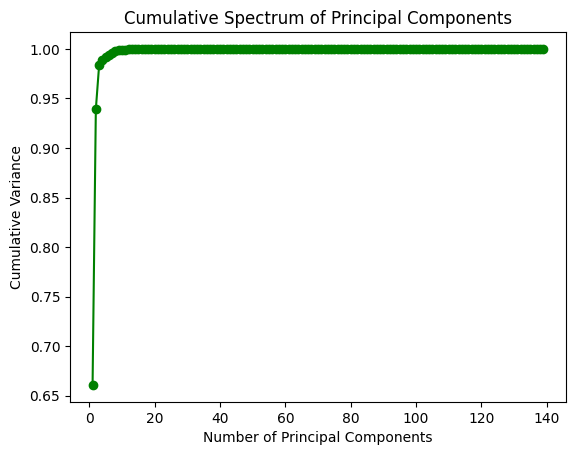

In [10]:
plt.plot(range(1, len(eigenvalues) + 1), cumulative_variance, marker='o', color = 'green')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Spectrum of Principal Components')
plt.show()

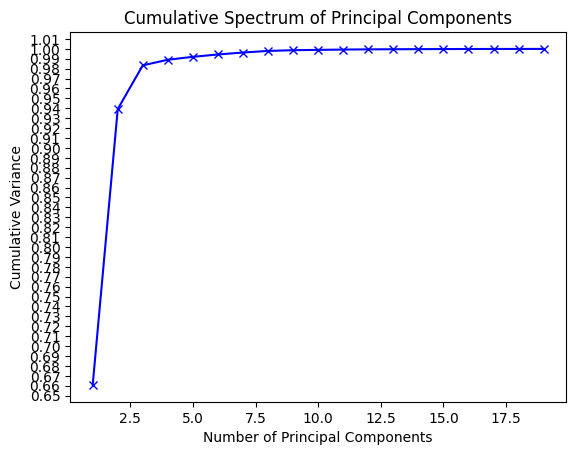

In [11]:
x = range(1, 20)
y = cumulative_variance[0:19]
fig , ax = plt.subplots()
fig.gca().yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.plot(x,y,marker='x', color='blue')
ax.set(title='Cumulative Spectrum of Principal Components', ylabel='Cumulative Variance', xlabel='Number of Principal Components')
plt.show()